<a href="https://colab.research.google.com/github/jisusP/Articulo/blob/main/Esteroides.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tanimoto con base en las huellas dactilares de Morgan**

In [ ]:
!pip install numpy
!pip install rdkit
!pip install seaborn
!pip install matplotlib.pyplot

In [34]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import scipy.cluster.hierarchy as shc

In [37]:
esteroides = {}
smiles = []
with open("/content/SMILES_Grafos.txt", "r") as archivo:
  #f = archivo.read()
  lineas = archivo.readlines()

  for id, line in enumerate(lineas):
    smiles.append(line)
    esteroides[f"CM{id+1}"] = [Chem.MolFromSmiles(line)]

fps_dicc={}
for i, llave in enumerate(esteroides):
  fps_dicc[f"fp{i+1}"] = [AllChem.GetMorganFingerprint(esteroides[llave][0], 2)]

#print(fps)
#DataStructs.TanimotoSimilarity(fps["fp1"][0], fps["fp1"][0])
fps_list = []


In [31]:
similarity_matrix = np.zeros((len(fps_dicc), len(fps_dicc)))
for i in range(len(fps_dicc)):
    for j in range(i+1, len(fps_dicc)):
        similarity = DataStructs.TanimotoSimilarity(fps_dicc[f"fp{i+1}"][0], fps_dicc[f"fp{j+1}"][0])
        #similarity = DataStructs.TanimotoSimilarity(fps[i], fps[j])
        similarity_matrix[i][j] = similarity
        similarity_matrix[j][i] = similarity
print(similarity_matrix)

[[0.         0.24761905 0.2970297  0.42391304 0.28431373 0.78481013
  0.60674157 0.4742268  0.31       0.59770115 0.48421053 0.28431373
  0.3030303  0.27184466 0.31632653 0.28431373 0.33333333 0.28971963
  0.49450549 0.4375     0.47191011]
 [0.24761905 0.         0.57333333 0.2967033  0.66197183 0.30612245
  0.26213592 0.23809524 0.35632184 0.36956522 0.29292929 0.68571429
  0.41463415 0.2967033  0.23404255 0.66197183 0.43023256 0.34408602
  0.36666667 0.28865979 0.49367089]
 [0.2970297  0.57333333 0.         0.38823529 0.51282051 0.36170213
  0.31313131 0.28712871 0.66197183 0.44827586 0.36170213 0.53246753
  0.48717949 0.3258427  0.33333333 0.51282051 0.75714286 0.62337662
  0.44705882 0.35869565 0.59459459]
 [0.42391304 0.2967033  0.38823529 0.         0.49367089 0.47126437
  0.47727273 0.51162791 0.59459459 0.61538462 0.6        0.35632184
  0.26086957 0.22916667 0.45       0.49367089 0.38202247 0.37362637
  0.64       0.62337662 0.66197183]
 [0.28431373 0.66197183 0.51282051 0.493

In [32]:
similitud_tanimoto = 1-(similarity_matrix)
print(similitud_tanimoto)

[[1.         0.75238095 0.7029703  0.57608696 0.71568627 0.21518987
  0.39325843 0.5257732  0.69       0.40229885 0.51578947 0.71568627
  0.6969697  0.72815534 0.68367347 0.71568627 0.66666667 0.71028037
  0.50549451 0.5625     0.52808989]
 [0.75238095 1.         0.42666667 0.7032967  0.33802817 0.69387755
  0.73786408 0.76190476 0.64367816 0.63043478 0.70707071 0.31428571
  0.58536585 0.7032967  0.76595745 0.33802817 0.56976744 0.65591398
  0.63333333 0.71134021 0.50632911]
 [0.7029703  0.42666667 1.         0.61176471 0.48717949 0.63829787
  0.68686869 0.71287129 0.33802817 0.55172414 0.63829787 0.46753247
  0.51282051 0.6741573  0.66666667 0.48717949 0.24285714 0.37662338
  0.55294118 0.64130435 0.40540541]
 [0.57608696 0.7032967  0.61176471 1.         0.50632911 0.52873563
  0.52272727 0.48837209 0.40540541 0.38461538 0.4        0.64367816
  0.73913043 0.77083333 0.55       0.50632911 0.61797753 0.62637363
  0.36       0.37662338 0.33802817]
 [0.71568627 0.33802817 0.48717949 0.506

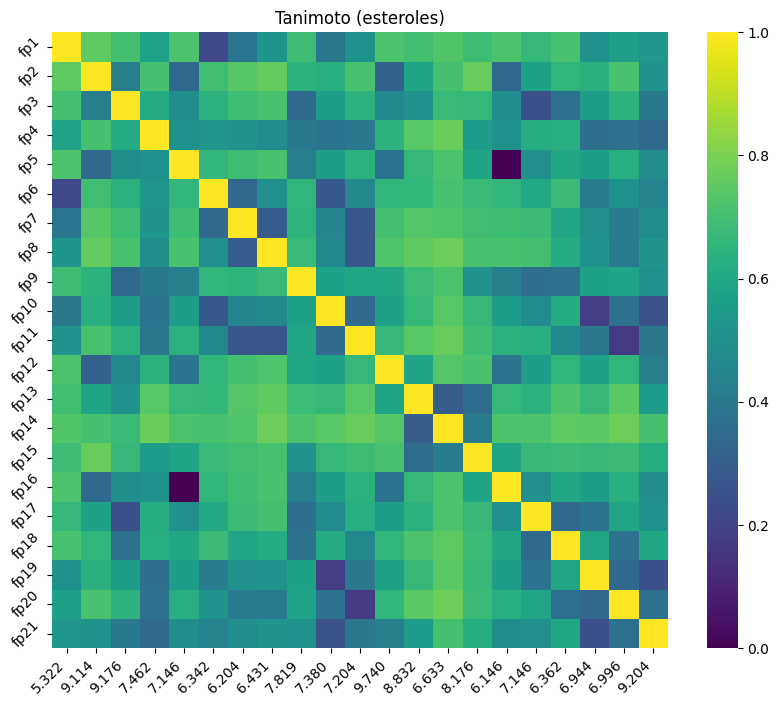

In [43]:
plt.figure(figsize=(10, 8))
sns.heatmap(similitud_tanimoto, annot=False, cbar=True, square=True, cmap='viridis')

labels = [i for i in fps_dicc]
LogK = ["5.322","9.114","9.176","7.462","7.146","6.342","6.204","6.431","7.819","7.380","7.204","9.740","8.832","6.633","8.176","6.146","7.146","6.362","6.944","6.996","9.204"]
plt.xticks(np.arange(len(labels)) + 0.5, LogK, rotation=45, ha='right')
plt.yticks(np.arange(len(labels)) + 0.5, labels, rotation=45, ha='right')
# Configurar el aspecto del heatmap
plt.title("Tanimoto (esteroles)")
plt.xlabel
plt.ylabel

# Mostrar el heatmap
plt.show()

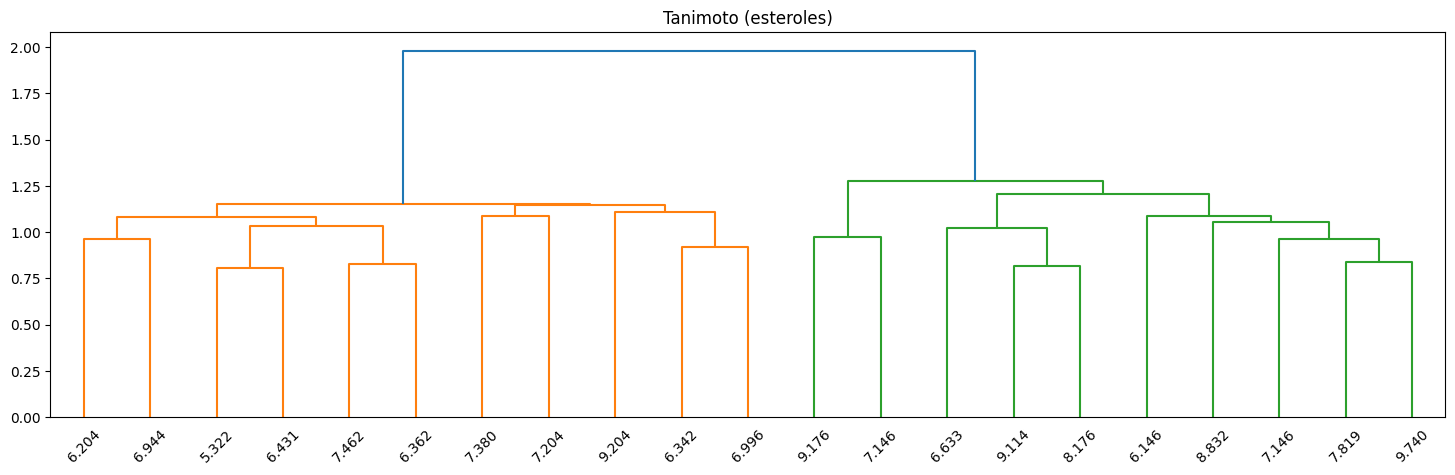

In [44]:
plt.figure(figsize=(18,5))
plt.title("Tanimoto (esteroles)")
d = shc.dendrogram(shc.linkage(similitud_tanimoto, method = "ward"), labels = LogK)

# **Randic con base en su número atómico promedio, utilizando la matriz de Barysz**

In [39]:
def randic_index(smiles):
  mol = Chem.MolFromSmiles(smiles)
  if mol is None:
    return None
  atomic_numbers = [atom.GetAtomicNum() for atom in mol.GetAtoms()]

    # Construir la matriz de Barysz ponderada por el número atómico
  barysz_matrix = np.zeros((len(atomic_numbers), len(atomic_numbers)))

  for bond in mol.GetBonds():
      i = bond.GetBeginAtomIdx()
      j = bond.GetEndAtomIdx()

      # Ponderar el elemento de la matriz por el número atómico promedio
      weight = (atomic_numbers[i] + atomic_numbers[j]) / 2.0
      barysz_matrix[i, j] = weight
      barysz_matrix[j, i] = weight
  #M_adyacencia = Chem.GetAdjacencyMatrix(mol)

  N_atoms = mol.GetNumAtoms()
  Grado_conectividad = np.sum(barysz_matrix, axis=1)
  randic = 0
  for i in range(N_atoms):
    for j in range(i+1, N_atoms):
      if barysz_matrix[i, j] != 0:
        randic += 1 /(Grado_conectividad[i] * Grado_conectividad[j])**0.5
  return randic#, Grado_conectividad

def randic_similarity(ri1, ri2):
  return 1 - abs(ri1 - ri2)

randic = []
for smile in smiles:
  randic.append(randic_index(smile))

similarity_matrix_randic = [[randic_similarity(ri1, ri2) for ri2 in randic] for ri1 in randic]
distance_matrix_randic = [[1 - randic_similarity(ri1, ri2) for ri2 in randic] for ri1 in randic]

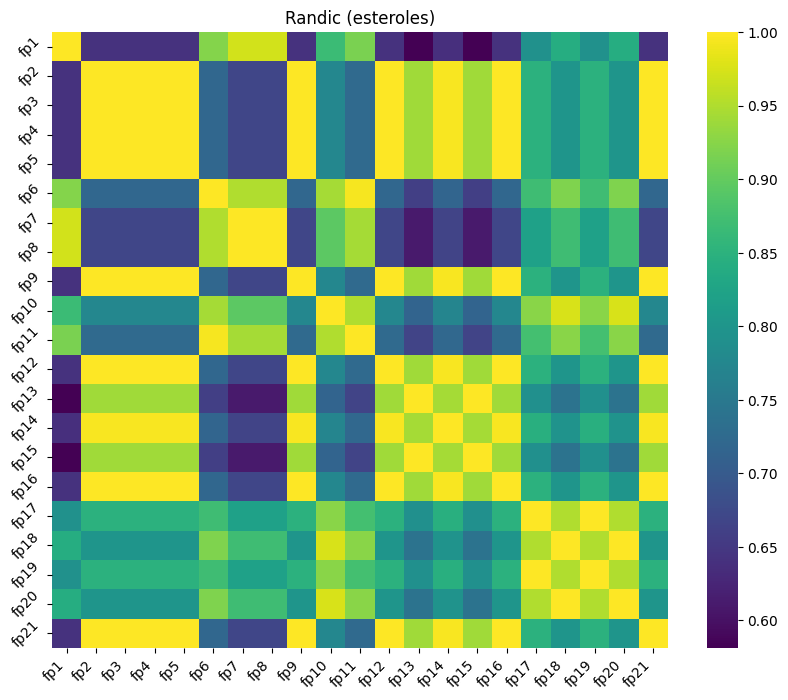

In [40]:
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix_randic, annot=False, cbar=True, square=True, cmap='viridis')

plt.xticks(np.arange(len(labels)) + 0.5, labels, rotation=45, ha='right')
plt.yticks(np.arange(len(labels)) + 0.5, labels, rotation=45, ha='right')
# Configurar el aspecto del heatmap
plt.title("Randic (esteroles)")
plt.xlabel
plt.ylabel

# Mostrar el heatmap
plt.show()

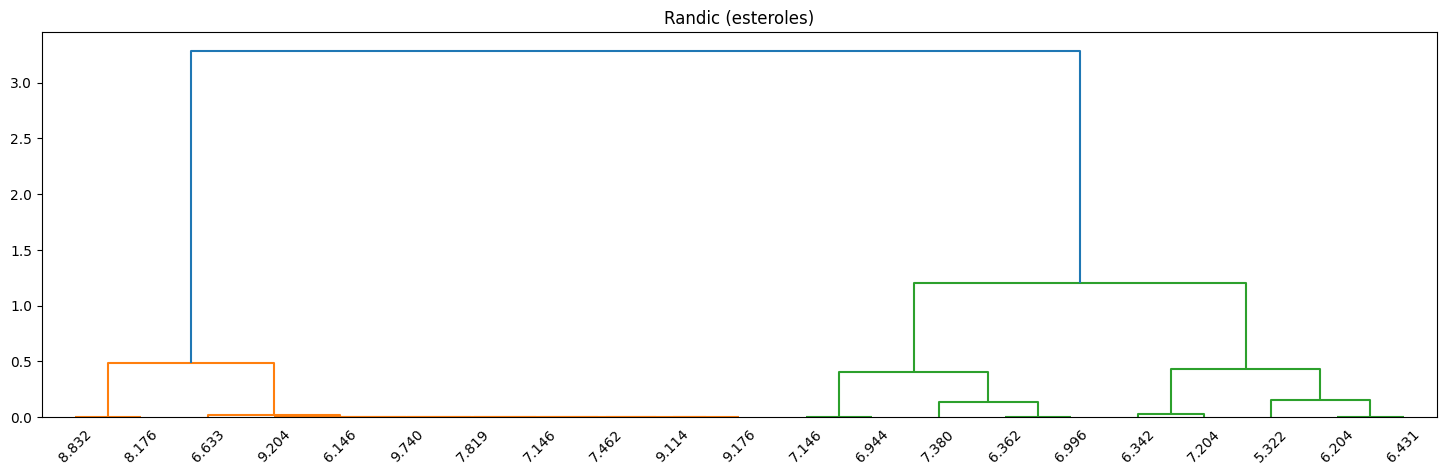

In [45]:
plt.figure(figsize=(18,5))
plt.title("Randic (esteroles)")
d = shc.dendrogram(shc.linkage(similarity_matrix_randic, method = "ward"), labels = LogK)